In [1]:
import os
import re

import pandas as pd
import numpy as np
import scanpy as sc
import einops
import tifffile
import matplotlib.pyplot as plt
from tifffile import TiffFile, TiffWriter
from ome_types import from_xml
from einops import rearrange

In [2]:
%load_ext autoreload

In [3]:
%autoreload 2

In [4]:
import multiplex_imaging_pipeline.utils as utils
from multiplex_imaging_pipeline.ome import save_basic_ome
from multiplex_imaging_pipeline.spatial_features import auto_calculate_threshold

In [ ]:
analysis_summary = pd.read_csv('')
analysis_summary

In [6]:
mapping = {
    'HT308B1-S1H5A4_right_05262023': '/diskmnt/Projects/Users/estorrs/multiplex_data/codex/htan/brca/052623_HT171B1-S1H9A1-A4_top_HT243B1-S1H4A4_HT271B1-S1H6A5_HT308B1-S1H5A4_btm/level_2/HT308B1-S1H5A4_right_05262023.ome.tiff',
    'HT308B1-S1H5A4_left_05262023': '/diskmnt/Projects/Users/estorrs/multiplex_data/codex/htan/brca/06062023_GBM_HS-18-6934-2A_TOP_HS-19-14816-1J_BTM/level_2/HS-18-6934-2A_06062023.ome.tiff',
    'HT308B1-S1H5A4_right_05272023': '/diskmnt/Projects/Users/estorrs/multiplex_data/codex/htan/brca/052623_HT171B1-S1H9A1-A4_top_HT243B1-S1H4A4_HT271B1-S1H6A5_HT308B1-S1H5A4_btm/level_2/HT308B1-S1H5A4_right_05262023.ome.tiff',
    'HT308B1-S1H5A4_left_05272023': '/diskmnt/Projects/Users/estorrs/multiplex_data/codex/htan/brca/06062023_GBM_HS-18-6934-2A_TOP_HS-19-14816-1J_BTM/level_2/HS-18-6934-2A_06062023.ome.tiff',
    'HT308B1-S1H5A4_right_05272023_1': '/diskmnt/Projects/Users/estorrs/multiplex_data/codex/htan/brca/052623_HT171B1-S1H9A1-A4_top_HT243B1-S1H4A4_HT271B1-S1H6A5_HT308B1-S1H5A4_btm/level_2/HT308B1-S1H5A4_right_05262023.ome.tiff',
    'HT308B1-S1H5A4_left_05272023_2': '/diskmnt/Projects/Users/estorrs/multiplex_data/codex/htan/brca/06062023_GBM_HS-18-6934-2A_TOP_HS-19-14816-1J_BTM/level_2/HS-18-6934-2A_06062023.ome.tiff',
}

In [5]:
d1 = utils.extract_ome_tiff(
    '/diskmnt/Projects/Users/estorrs/multiplex_data/codex/htan/brca/052623_HT171B1-S1H9A1-A4_top_HT243B1-S1H4A4_HT271B1-S1H6A5_HT308B1-S1H5A4_btm/level_2/HT308B1-S1H5A4_right_05262023.ome.tiff',
    level=-1
)
d2 = utils.extract_ome_tiff(
    '/diskmnt/Projects/Users/estorrs/multiplex_data/codex/htan/brca/06062023_GBM_HS-18-6934-2A_TOP_HS-19-14816-1J_BTM/level_2/HS-18-6934-2A_06062023.ome.tiff',
    level=-1
)


/diskmnt/Projects/Users/estorrs/miniconda3/envs/mip/lib/python3.8/site-packages/ome_types/_convenience.py:112: FutureWarning: The default XML parser will be changing from 'xmlschema' to 'lxml' in version 0.4.0.  To silence this warning, please provide the `parser` argument, specifying either 'lxml' (to opt into the new behavior), or'xmlschema' (to retain the old behavior).
  d = to_dict(os.fspath(xml), parser=parser, validate=validate)


-1 (34, 750, 625)
-1 (24, 937, 1320)


In [ ]:
d1['DAPI'].shape

In [ ]:
d2['DAPI'].shape

In [13]:
sample_to_img = {}
sample_to_img_mask = {}
channels = set()
font = '/diskmnt/Projects/Users/estorrs/imaging-analysis/resources/fonts/Roboto-Bold.ttf'
for s, fp in mapping.items():
    c2i = utils.extract_ome_tiff(fp, level=-2)
    print(c2i['DAPI'].shape)
    c2i = {utils.R_CHANNEL_MAPPING.get(k, k):v for k, v in c2i.items()}
#     channel_to_threshold = {k:auto_calculate_threshold(v) for k, v in c2i.items()}
#     print(channel_to_threshold)
    c2i_mask = {k:v>=auto_calculate_threshold(v) for k, v in c2i.items()}
#     plt.imshow(c2i_mask['DAPI'])
#     plt.show()
    for k, v in c2i_mask.items():
        v = v.astype(np.uint8)
        v[v>0] = 255
        c2i_mask[k] = v
        
    c2i = {k:utils.write_label(v, s, font=font, fontsize=20) for k, v in c2i.items()}
    c2i_mask = {k:utils.write_label(v.astype(np.uint8), s, font=font, fontsize=20) for k, v in c2i_mask.items()}
    channels.update(c2i.keys())
    sample_to_img[s] = c2i
    sample_to_img_mask[s] = c2i_mask

channels = sorted(channels)

-2 (34, 1500, 1250)
(1500, 1250)
-2 (24, 1875, 2640)
(1875, 2640)
-2 (34, 1500, 1250)
(1500, 1250)
-2 (24, 1875, 2640)
(1875, 2640)
-2 (34, 1500, 1250)
(1500, 1250)
-2 (24, 1875, 2640)
(1875, 2640)


In [14]:
channels

['BCA1',
 'Bap1',
 'CD11b',
 'CD163',
 'CD20',
 'CD31',
 'CD3e',
 'CD4',
 'CD45',
 'CD68',
 'CD8',
 'CK14',
 'CK19',
 'CK5',
 'COX6c',
 'CTLA4',
 'DAPI',
 'E-cadherin',
 'ER',
 'FN1',
 'GATA3',
 'GFAP',
 'GLUT1',
 'HIF1a',
 'HLA-DR',
 'Her2',
 'IBA1',
 'Ki67',
 'MGP',
 'OLIG2',
 'PAI1',
 'PLAT/tPA',
 'PR',
 'PTPRZ1',
 'Pan-Cytokeratin',
 'Podoplanin',
 'SLC39A6',
 'SMA',
 'TFF1',
 'TUBB3',
 'VEGFA',
 'Vimentin',
 'cKit']

In [15]:
def get_mosaic(sample_to_img):
    samples = sorted(sample_to_img.keys())
    pool = sorted(set([re.sub(r'^.*([0-9]{8}).*$', r'\1', x) for x in samples]))
#     print(pool)
    rows = []
    for date in pool:
        row = []
        order = sorted([x for x in samples if date in x])
        for sample in order:
            row.append(sample_to_img[sample])
        rows.append(row)
    
    row_dims = []
    for row in rows:
        max_r, max_c = 0, 0
        for d in row:
            x = next(iter(d.values()))
            max_c += x.shape[1]
            max_r = max(max_r, x.shape[0])
        row_dims.append([max_r, max_c])
    row_dims = np.asarray(row_dims)
#     print(row_dims)
    
    mosaic = np.zeros((len(channels), row_dims[:, 0].sum(), row_dims[:, 1].max()), dtype=np.uint8)
    r = 0
    for row, row_dim in zip(rows, row_dims):
        print(len(row))
        c = 0
        for d in row:
            spacing_c = next(iter(d.values())).shape[-1]
            for i, (channel, x) in enumerate(d.items()):
                mosaic[i, r:r+x.shape[-2], c:c+spacing_c] = x
            c += spacing_c
        r += row_dim[0]
    return mosaic

In [16]:
mosaic = get_mosaic(sample_to_img)
mosaic.shape

2
4


(43, 3750, 7780)

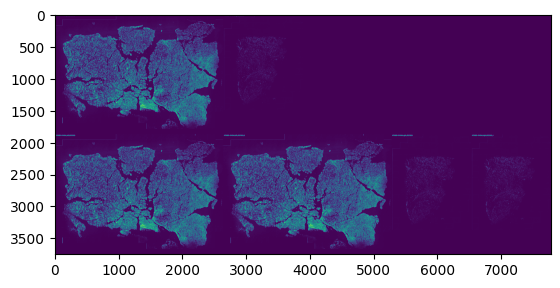

In [17]:
plt.imshow(mosaic[channels.index('DAPI')])

In [18]:
fp = '/diskmnt/Projects/Users/estorrs/imaging-analysis/data/brca_subtype/mosaic.ome.tiff'
save_basic_ome(fp, mosaic, channels)

In [19]:
mosaic = get_mosaic(sample_to_img_mask)
mosaic.shape

2
4


(43, 3750, 7780)

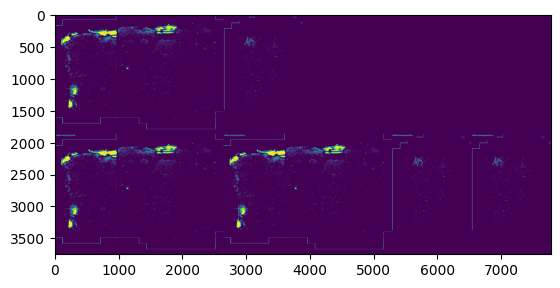

In [23]:
plt.imshow(mosaic[channels.index('CD3e')])

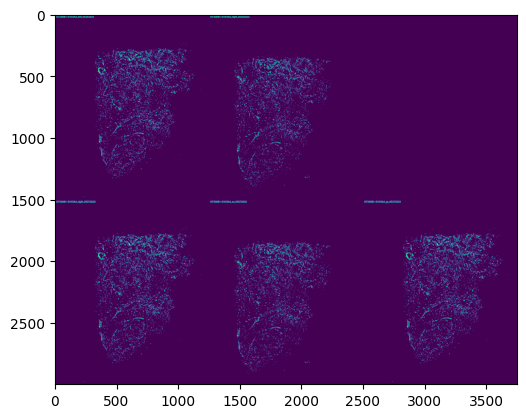

In [151]:
plt.imshow(mosaic[channels.index('DAPI')])

In [112]:
samples = sorted(sample_to_img.keys())
pool = sorted(set([re.sub(r'^.*([0-9]{8}).*$', r'\1', x) for x in samples]))
rows = []
for date in pool:
    row = []
    order = sorted([x for x in samples if date in x])
    for sample in order:
        row.append(sample_to_img[sample])
    rows.append(row)
len(rows)

2

In [113]:
row_dims = []
for row in rows:
    max_r, max_c = 0, 0
    for d in row:
        x = next(iter(d.values()))
        max_c += x.shape[1]
        max_r = max(max_r, x.shape[0])
    row_dims.append([max_r, max_c])
row_dims = np.asarray(row_dims)
row_dims

array([[ 750, 1250],
       [ 750, 1875]])

In [114]:
mosaic = np.zeros((len(channels), row_dims[:, 0].sum(), row_dims[:, 1].max()), dtype=np.uint8)
r = 0
for row, row_dim in zip(rows, row_dims):
    c = 0
    for d in row:
        spacing_c = next(iter(d.values())).shape[-1]
        for i, (channel, x) in enumerate(d.items()):
            mosaic[i, r:r+x.shape[-2], c:c+spacing_c] = x
        c += spacing_c
    r += row_dim[0]
mosaic.shape

(34, 1500, 1875)

In [108]:
mosaic_fp = '/diskmnt/Projects/Users/estorrs/imaging-analysis/data/brca_subtype/mosaic.ome.tiff'
with TiffWriter(mosaic_fp, bigtiff=True) as tif:
    metadata={
        'axes': 'TCYXS',
        'Channel': {'Name': channels},
    }
    tif.write(
        rearrange(mosaic, 'c y x -> 1 c y x 1'),
        metadata=metadata,
        compression='LZW',
    )

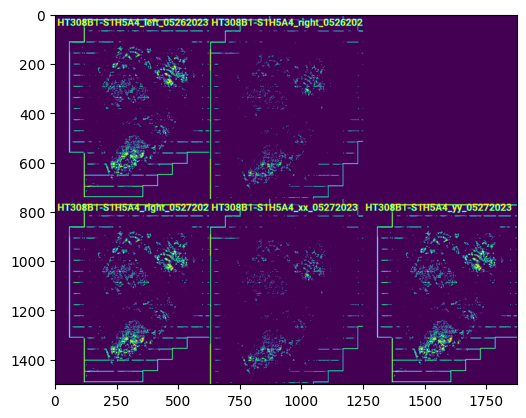

In [102]:
plt.imshow(mosaic[10]>1)

In [ ]:
with TiffWriter('temp.ome.tif', bigtiff=True) as tif:
...     metadata={
...         'axes': 'TCYXS',
...         'Channel': {'Name': ['Channel 1', 'Channel 2']},
...         'Plane': {'PositionX': [0.0] * 16, 'PositionXUnit': ['µm'] * 16}
...     }
...     options = dict(
...         photometric='rgb',
...         tile=(128, 128),
...         compression='jpeg',
...         resolutionunit='CENTIMETER'
...     )
...     tif.write(
...         data,
...         subifds=subresolutions,
...         resolution=(1e4 / pixelsize, 1e4 / pixelsize),
...         metadata=metadata,
...         **options
...     )

In [163]:
fp = '/diskmnt/Projects/Users/estorrs/multiplex_data/codex/htan/brca/052623_HT171B1-S1H9A1-A4_top_HT243B1-S1H4A4_HT271B1-S1H6A5_HT308B1-S1H5A4_btm/level_2/HT308B1-S1H5A4_left_05262023.ome.tiff'




In [32]:
c2i = utils.extract_ome_tiff(fp, level=-1)

/diskmnt/Projects/Users/estorrs/miniconda3/envs/mip/lib/python3.8/site-packages/ome_types/_convenience.py:112: FutureWarning: The default XML parser will be changing from 'xmlschema' to 'lxml' in version 0.4.0.  To silence this warning, please provide the `parser` argument, specifying either 'lxml' (to opt into the new behavior), or'xmlschema' (to retain the old behavior).
  d = to_dict(os.fspath(xml), parser=parser, validate=validate)


In [41]:
x = c2i['DAPI']

In [59]:
from PIL import Image, ImageDraw, ImageFont
def write_label(img, text, font=None, fontsize=40):
    img = Image.fromarray(x)
 
    draw = ImageDraw.Draw(img)
    if font is not None:
        draw.font = ImageFont.truetype(font, fontsize)
    draw.text((10, 10), text, fill=255)
    new = np.asarray(img)
    return new

In [33]:
c2i.keys()

dict_keys(['DAPI', 'CD8', 'Her2 (D)', 'GATA3 (D)', 'cKIT-(D)', 'PanCK (D)', 'GLUT1-(D)', 'Podoplanin (D)', 'HLA-DR', 'CK14 (D)', 'TFF1', 'MGP-(D)', 'E-cadherin', 'SMA-(D)', 'CD3e', 'Ki67', 'Vimentin-(D)', 'CD11b (D)', 'PR-(D)', 'Bap1 (D)', 'CD45 (D)', 'ER', 'CD31', 'COX6c (D)', 'CK19', 'Keratin 5', 'PLAT/tPA (D)', 'CTLA4', 'CD4 (D)', 'SLC39A6', 'CD20', 'BCA1', 'CD163', 'CD68 (D)'])

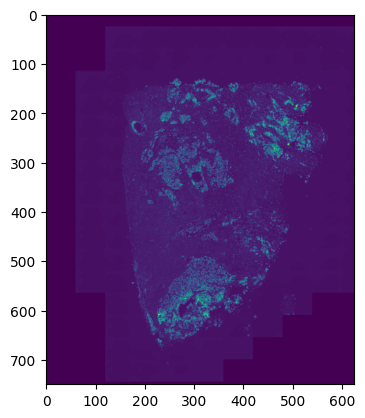

In [34]:
plt.imshow(c2i['DAPI'])

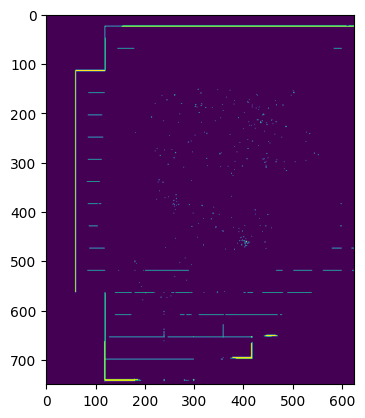

In [37]:
plt.imshow(c2i['CD8']>8)

In [164]:
fp = '/diskmnt/Projects/Users/estorrs/multiplex_data/codex/htan/brca/052623_HT171B1-S1H9A1-A4_top_HT243B1-S1H4A4_HT271B1-S1H6A5_HT308B1-S1H5A4_btm/level_2/HT308B1-S1H5A4_left_05262023.ome.tiff'


In [165]:
tif = TiffFile(fp)
ome = from_xml(tif.ome_metadata)
im = ome.images[0]
# d = {}
# img_channels, img_channels, imgs = [], [], []
# for c, p in zip(im.pixels.channels, tif.pages):

In [168]:
levels = tif.series[0].levels

In [170]:
levels[2]

IndexError: list index out of range

In [27]:
x = tif.series[0].levels[-1].asarray()

In [28]:
# construct mosaic

In [29]:
x.shape

(34, 750, 625)

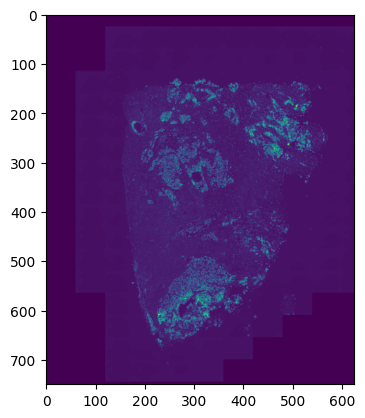

In [30]:
plt.imshow(x[0])

In [31]:
p = tif.pages[0]

In [ ]:
p.